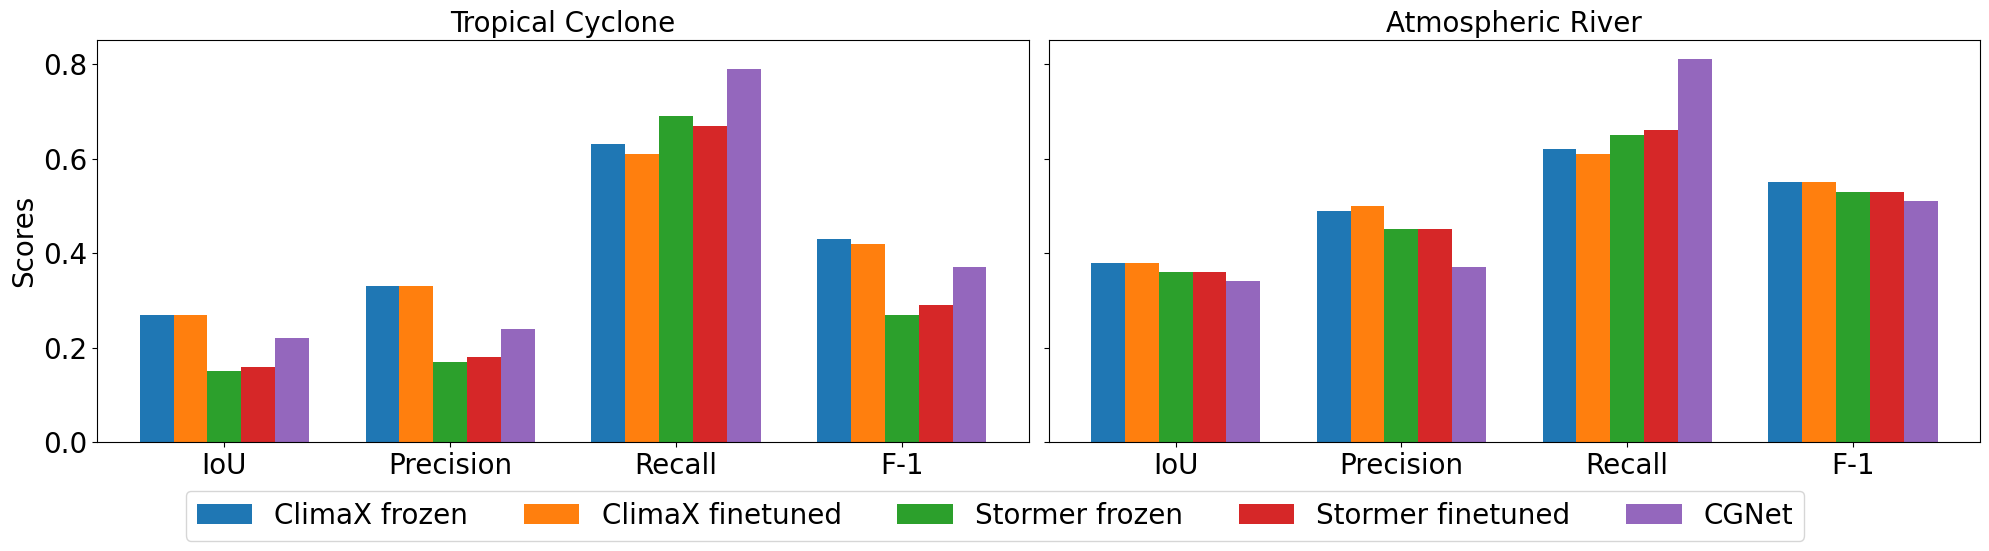

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data for TC and AR
models = ['ClimaX frozen', 'ClimaX finetuned', 'Stormer frozen', 'Stormer finetuned', 'CGNet']
metrics = ['IoU', 'Precision', 'Recall', 'F-1']

TC_data = [
    [0.27, 0.33, 0.63, 0.43],
    [0.27, 0.33, 0.61, 0.42],
    [0.15, 0.17, 0.69, 0.27],
    [0.16, 0.18, 0.67, 0.29],
    [0.22, 0.24, 0.79, 0.37]
]

AR_data = [
    [0.38, 0.49, 0.62, 0.55],
    [0.38, 0.50, 0.61, 0.55],
    [0.36, 0.45, 0.65, 0.53],
    [0.36, 0.45, 0.66, 0.53],
    [0.34, 0.37, 0.81, 0.51]
]

x = np.arange(len(metrics))
width = 0.15  # the width of the bars
fontsize = 20

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

for i, data in enumerate(TC_data):
    ax[0].bar(x + i*width, data, width, label=models[i])

for i, data in enumerate(AR_data):
    ax[1].bar(x + i*width, data, width, label=models[i])

# Increase font size for labels, title, and ticks
font_size = 14
ax[0].set_ylabel('Scores', fontsize=fontsize)
ax[0].set_title('Tropical Cyclone', fontsize=fontsize)
ax[0].set_xticks(x + width*2)
ax[0].set_xticklabels(metrics, fontsize=fontsize)
ax[0].tick_params(labelsize=fontsize)
# ax[0].legend(loc='best', fontsize=font_size)

ax[1].set_title('Atmospheric River', fontsize=fontsize)
ax[1].set_xticks(x + width*2)
ax[1].set_xticklabels(metrics, fontsize=fontsize)
# ax[1].legend(loc='best', fontsize=font_size)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, fontsize=fontsize, bbox_to_anchor=(0.5, -0.12))

fig.tight_layout()
plt.savefig('./extreme_detection.pdf', bbox_inches='tight')
plt.show()

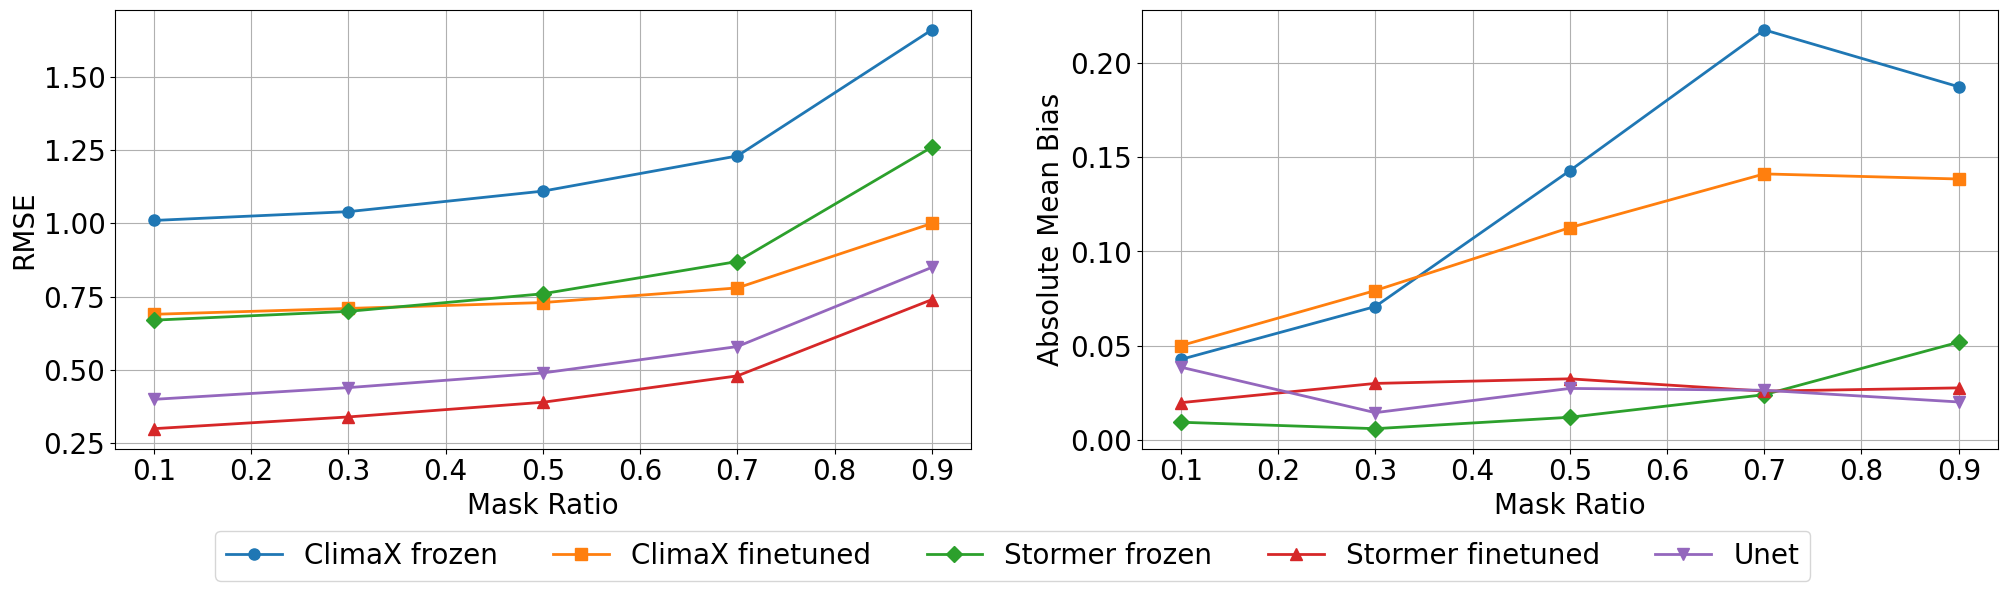

In [26]:
import matplotlib.pyplot as plt

# Data
mask_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

rmse_data = {
    'ClimaX frozen': [1.01, 1.04, 1.11, 1.23, 1.66],
    'ClimaX finetuned': [0.69, 0.71, 0.73, 0.78, 1.00],
    'Stormer frozen': [0.67, 0.70, 0.76, 0.87, 1.26],
    'Stormer finetuned': [0.30, 0.34, 0.39, 0.48, 0.74],
    'Unet': [0.40, 0.44, 0.49, 0.58, 0.85]
}

mean_bias_data = {
    'ClimaX frozen': [0.04271, 0.07076, 0.1428, 0.2175, 0.1873],
    'ClimaX finetuned': [0.05002, 0.07925, 0.1126, 0.1411, 0.1384],
    'Stormer frozen': [0.009419, 0.006004, 0.01205, 0.02402, 0.05186],
    'Stormer finetuned': [0.01979, 0.03, 0.03244, 0.02591, 0.02763],
    'Unet': [0.03863, 0.0145, 0.02734, 0.02639, 0.02016]
}

markers = ['o', 's', 'D', '^', 'v']
models = list(rmse_data.keys())

fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=False)

fontsize = 20

# Plot RMSE
for i, model in enumerate(models):
    axs[0].plot(mask_ratios, rmse_data[model], marker=markers[i], linewidth=2, markersize=8, label=model)
axs[0].set_xlabel('Mask Ratio', fontsize=fontsize)
axs[0].set_ylabel('RMSE', fontsize=fontsize)
# axs[0].set_title('RMSE across Different Mask Ratios', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)
axs[0].grid(True)

# Plot Absolute Mean Bias
for i, model in enumerate(models):
    axs[1].plot(mask_ratios, mean_bias_data[model], marker=markers[i], linewidth=2, markersize=8, label=model)
axs[1].set_xlabel('Mask Ratio', fontsize=fontsize)
axs[1].set_ylabel('Absolute Mean Bias', fontsize=fontsize)
# axs[1].set_title('Absolute Mean Bias across Different Mask Ratios', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)
axs[1].grid(True)

# Combined Legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, fontsize=fontsize, bbox_to_anchor=(0.5, 0.0))
# push legend a little bit top
# fig.subplots_adjust(top=0.9)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.subplots_adjust(wspace=0.2)  # Add space between the two plots
plt.savefig('./infilling.pdf', bbox_inches='tight')
plt.show()